# Interactive Visualization with Leafmap

## Introduction

## Learning Objectives

## Installing and Setting Up Leafmap

### Installation Methods

In [1]:
# %conda install -c conda-forge leafmap

In [2]:
# %pip install -U leafmap

In [2]:
import leafmap

### Understanding Leafmap's Backend Architecture

In [4]:
# import leafmap.foliumap as leafmap  # For folium backend
# import leafmap.maplibregl as leafmap  # For MapLibre backend

## Creating Interactive Maps

### Your First Interactive Map

In [ ]:
m = leafmap.map()
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Customizing Map Properties

#### Setting Center Location and Zoom Level

In [5]:
# Center the map on the continental United States
m = leafmap.Map(center=(80, -100), zoom=4, height="600px")
m

Map(center=[80, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Managing Map Controls

#### Understanding Default Controls

#### Customizing Control Visibility

In [6]:
# Create a minimal map with most controls disabled
m = leafmap.Map(
    center=(40, -100),
    zoom=4,
    zoom_control=False,  # Remove zoom buttons
    draw_control=False,  # Remove drawing tools
    scale_control=False,  # Remove scale indicator
    fullscreen_control=False,  # Remove fullscreen button
    attribution_control=False,  # Remove attribution text
    toolbar_control=False,  # Remove Leafmap toolbar
)
m

Map(center=[40, -100], crs={'name': 'EPSG3857', 'custom': False}, default_style=MapStyle(), dragging_style=Map…

#### Adding Search Functionality

In [11]:
# Create a new map for demonstration
m = leafmap.Map(center=(40, -100), zoom=4, draw_control=False, height="500px")

# Add search control using OpenStreetMap's Nominatim service
url = "https://nominatim.openstreetmap.org/search?format=json&q={s}"
m.add_search_control(url, zoom=5, position="topright")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Working with Map Layers

#### Accessing and Inspecting Layers

In [12]:
# Create a simple map and examine its layers
m = leafmap.Map()
print(f"Number of layers: {len(m.layers)}")
print(f"Layer types: {[type(layer).__name__ for layer in m.layers]}")

Number of layers: 1
Layer types: ['TileLayer']


#### Layer Management Operations

In [14]:
# Remove the last layer (be careful with this operation)
print(len(m.layers))
if len(m.layers) > 1:  # Keep at least one layer
    m.remove(m.layers[-1])

# Check the remaining layers
print(f"Remaining layers: {len(m.layers)}")

1
Remaining layers: 1


#### Clearing Map Content

In [17]:
# Create a map with default content
m = leafmap.Map()

# Remove all interactive controls
m.clear_controls()

# Remove all layers (this will result in a blank map)
m.clear_layers()

# Display the minimal map
m

Map(center=[20, 0], crs={'name': 'EPSG3857', 'custom': False}, default_style=MapStyle(), dragging_style=MapSty…

## Changing Basemaps

### Understanding Basemaps and Their Role

### Adding Predefined Basemaps

In [18]:
m = leafmap.Map()
m.add_basemap("OpenTopoMap")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Interactive Basemap Selection

In [19]:
m = leafmap.Map()
m.add_basemap_gui()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Adding Custom XYZ Tile Layers

In [26]:
m = leafmap.Map()
m.add_tile_layer(
    url="https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}",
    name="Google Satellite",
    attribution="Google",
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Adding Web Map Service (WMS) Layers

In [27]:
m = leafmap.Map(center=[40, -100], zoom=4)
url = "https://imagery.nationalmap.gov/arcgis/services/USGSNAIPPlus/ImageServer/WMSServer?"
m.add_wms_layer(
    url=url,
    layers="USGSNAIPPlus",
    name="NAIP",
    attribution="USGS",
    format="image/png",
    shown=True,
)
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Adding Legends for Data Context

In [28]:
m = leafmap.Map(center=[40, -100], zoom=4)
m.add_basemap("Esri.WorldImagery")
url = "https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2021_Land_Cover_L48/wms?"
m.add_wms_layer(
    url=url,
    layers="NLCD_2021_Land_Cover_L48",
    name="NLCD 2021",
    attribution="MRLC",
    format="image/png",
    shown=True,
)
m.add_legend(title="NLCD Land Cover Type", builtin_legend="NLCD")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Adding Colorbars for Continuous Data

In [29]:
m = leafmap.Map()
m.add_basemap("OpenTopoMap")
m.add_colormap(
    cmap="terrain",
    label="Elevation (meters)",
    orientation="horizontal",
    vmin=0,
    vmax=4000,
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [18]:
import leafmap.colormaps as cm

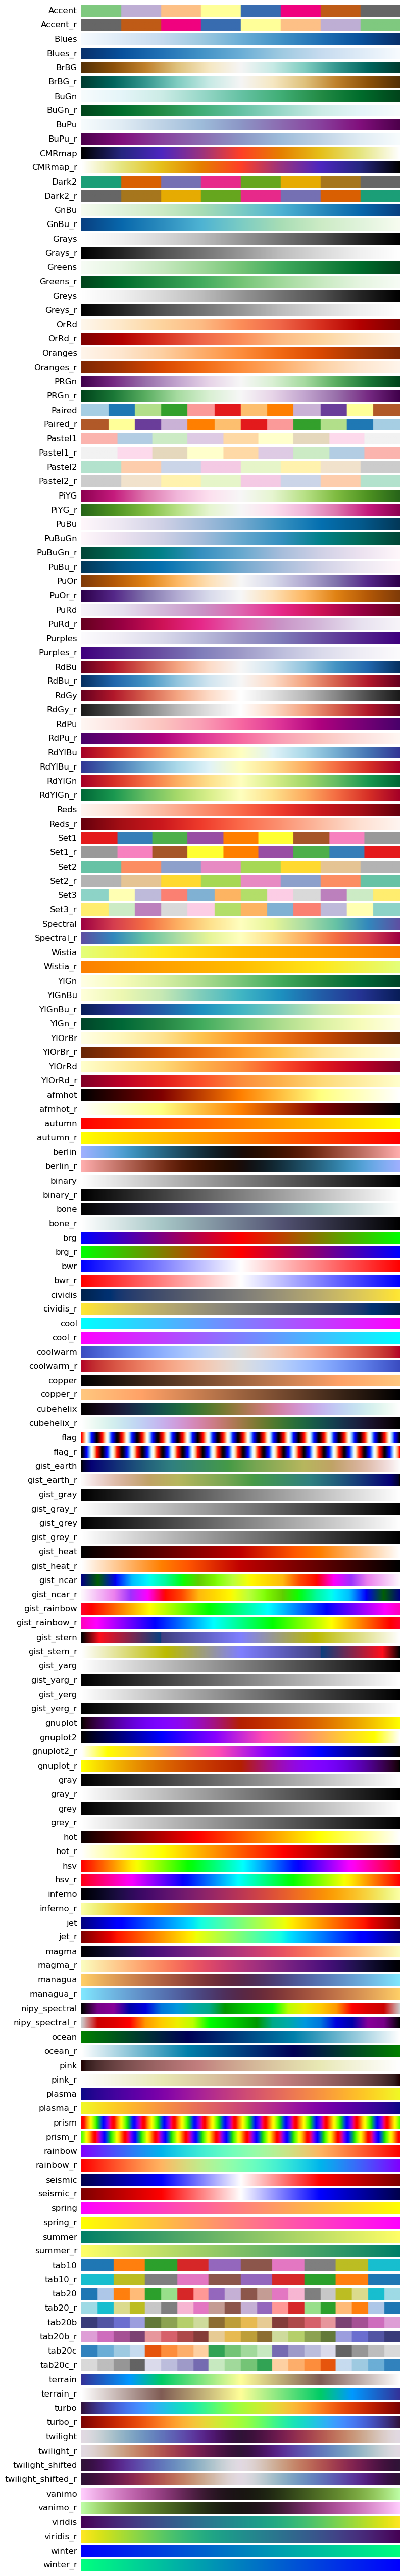

In [19]:
cm.plot_colormaps(width=8, height=0.3)

## Visualizing Vector Data

### Working with Point Data: Markers

#### Adding Individual Markers

In [30]:
m = leafmap.Map()
location = [40, -100]  # [latitude, longitude]
m.add_marker(location, draggable=False)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Adding Multiple Markers Efficiently

In [31]:
m = leafmap.Map()
# Coordinates for three different cities
locations = [
    [40, -100],  # Central US
    [45, -110],  # Northwestern US
    [50, -120],  # Southwestern Canada
]
m.add_markers(markers=locations)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Managing Large Point Datasets with Clustering

In [22]:
m = leafmap.Map()
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
m.add_marker_cluster(url, x="longitude", y="latitude", layer_name="World cities")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Advanced Marker Customization

In [23]:
m = leafmap.Map(center=[40, -100], zoom=4)
cities = "https://github.com/opengeos/datasets/releases/download/us/cities.csv"
regions = "https://github.com/opengeos/datasets/releases/download/us/us_regions.geojson"
m.add_geojson(regions, layer_name="US Regions")
m.add_points_from_xy(
    cities,
    x="longitude",
    y="latitude",
    color_column="region",
    icon_names=["gear", "map", "leaf", "globe"],
    spin=True,
    add_legend=True,
)
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Visualizing Polylines

In [24]:
m = leafmap.Map(center=[20, 0], zoom=2)
data = "https://github.com/opengeos/datasets/releases/download/vector/cables.geojson"
m.add_vector(data, layer_name="Cable lines", info_mode="on_hover")
m

Skipping field coordinates: unsupported OGR type: 3


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Customizing Polyline Styles

In [25]:
m = leafmap.Map(center=[20, 0], zoom=2)
m.add_basemap("CartoDB.DarkMatter")
data = "https://github.com/opengeos/datasets/releases/download/vector/cables.geojson"
callback = lambda feat: {"color": feat["properties"]["color"], "weight": 2}
m.add_vector(data, layer_name="Cable lines", style_callback=callback)
m

Skipping field coordinates: unsupported OGR type: 3


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Visualizing Polygons

In [32]:
m = leafmap.Map()
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
m.add_vector(url, layer_name="NYC Buildings", zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Visualizing GeoPandas GeoDataFrames

In [27]:
url = "https://github.com/opengeos/datasets/releases/download/places/las_vegas_buildings.geojson"
gdf = leafmap.read_vector(url)
gdf.head()

,id,height,geometry
0,08b2986b81b34fff0200120c6aabf673,2.539160,"POLYGON ((-115.20758 36.11913, -115.20754 36.1..."
1,08b2986b81b34fff0200ce30fa61746d,3.209284,"POLYGON ((-115.20756 36.11929, -115.20776 36.1..."
2,08b2986b81b34fff0200b898b488ab8b,2.691431,"POLYGON ((-115.20759 36.11932, -115.20759 36.1..."
3,08b2986b81b34fff02004b957b4cd490,2.795901,"POLYGON ((-115.20762 36.11953, -115.20775 36.1..."
4,08b2986b81869fff020091d66f33d09b,2.649764,"POLYGON ((-115.20727 36.11898, -115.20727 36.1..."


In [28]:
gdf.explore()

In [29]:
m = leafmap.Map()
m.add_basemap("Esri.WorldImagery")
style = {"color": "red", "fillColor": "red", "fillOpacity": 0.1, "weight": 2}
m.add_gdf(gdf, style=style, layer_name="Las Vegas Buildings", zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Creating Choropleth Maps

In [30]:
m = leafmap.Map()
data = "https://raw.githubusercontent.com/opengeos/leafmap/master/docs/data/countries.geojson"
m.add_data(
    data, column="POP_EST", scheme="Quantiles", cmap="Blues", legend_title="Population"
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
m = leafmap.Map()
m.add_data(
    data,
    column="POP_EST",
    scheme="EqualInterval",
    cmap="Blues",
    legend_title="Population",
)
m

## Visualizing GeoParquet Data

### Loading and Visualizing Point Data

In [ ]:
url = "https://opengeos.org/data/duckdb/cities.parquet"
gdf = leafmap.read_vector(url)
gdf.head()

In [ ]:
gdf.explore()

In [ ]:
m = leafmap.Map()
m.add_points_from_xy(gdf, x="longitude", y="latitude")
m

### Visualizing Polygon Data

In [ ]:
url = "https://data.source.coop/giswqs/nwi/wetlands/DC_Wetlands.parquet"
gdf = leafmap.read_vector(url)
gdf.head()

In [ ]:
gdf.explore()

In [ ]:
m = leafmap.Map()
m.add_basemap("Esri.WorldImagery", show=False)
m.add_nwi(gdf, col_name="WETLAND_TYPE", zoom_to_layer=True)
m

## Visualizing PMTiles

### Retrieving Metadata from PMTiles

In [ ]:
url = "https://opengeos.org/data/pmtiles/protomaps_firenze.pmtiles"
metadata = leafmap.pmtiles_metadata(url)
print(f"layer names: {metadata['layer_names']}")
print(f"bounds: {metadata['bounds']}")

### Visualizing PMTiles Data

In [ ]:
m = leafmap.Map()

style = {
    "version": 8,
    "sources": {
        "example_source": {
            "type": "vector",
            "url": "pmtiles://" + url,
            "attribution": "PMTiles",
        }
    },
    "layers": [
        {
            "id": "buildings",
            "source": "example_source",
            "source-layer": "landuse",
            "type": "fill",
            "paint": {"fill-color": "steelblue"},
        },
        {
            "id": "roads",
            "source": "example_source",
            "source-layer": "roads",
            "type": "line",
            "paint": {"line-color": "black"},
        },
    ],
}

# style = leafmap.pmtiles_style(url)  # Use default style
m.add_pmtiles(
    url, name="PMTiles", style=style, overlay=True, show=True, zoom_to_layer=True
)
m

### Visualizing Open Buildings Data with PMTiles

In [ ]:
url = "https://data.source.coop/vida/google-microsoft-open-buildings/pmtiles/go_ms_building_footprints.pmtiles"
metadata = leafmap.pmtiles_metadata(url)
print(f"layer names: {metadata['layer_names']}")
print(f"bounds: {metadata['bounds']}")

In [ ]:
m = leafmap.Map(center=[20, 0], zoom=2)
m.add_basemap("CartoDB.DarkMatter")
m.add_basemap("Esri.WorldImagery", show=False)

style = {
    "version": 8,
    "sources": {
        "example_source": {
            "type": "vector",
            "url": "pmtiles://" + url,
            "attribution": "PMTiles",
        }
    },
    "layers": [
        {
            "id": "buildings",
            "source": "example_source",
            "source-layer": "building_footprints",
            "type": "fill",
            "paint": {"fill-color": "#3388ff", "fill-opacity": 0.5},
        },
    ],
}

m.add_pmtiles(
    url, name="Buildings", style=style, overlay=True, show=True, zoom_to_layer=False
)
m

### Visualizing Overture Maps Data

In [ ]:
release = leafmap.get_overture_latest_release()
release

In [ ]:
theme = "buildings"
url = f"https://overturemaps-tiles-us-west-2-beta.s3.amazonaws.com/{release}/{theme}.pmtiles"

In [ ]:
style = {
    "version": 8,
    "sources": {
        "example_source": {
            "type": "vector",
            "url": "pmtiles://" + url,
            "attribution": "PMTiles",
        }
    },
    "layers": [
        {
            "id": "Building",
            "source": "example_source",
            "source-layer": "building",
            "type": "fill",
            "paint": {
                "fill-color": "#ffff00",
                "fill-opacity": 0.7,
                "fill-outline-color": "#ff0000",
            },
        },
    ],
}

In [ ]:
m = leafmap.Map(center=[47.65350739, -117.59664999], zoom=16)
m.add_basemap("Satellite")
m.add_pmtiles(url, style=style, layer_name="Buildings", zoom_to_layer=False)
m

## Visualizing Raster Data

### Visualizing Cloud Optimized GeoTIFFs (COGs)

#### Adding a Cloud Optimized GeoTIFF (COG)

In [ ]:
m = leafmap.Map(center=[39.494897, -108.507278], zoom=10)
url = "https://opendata.digitalglobe.com/events/california-fire-2020/pre-event/2018-02-16/pine-gulch-fire20/1030010076004E00.tif"
m.add_cog_layer(url, name="Fire (pre-event)")
m

In [ ]:
leafmap.cog_info(url)

In [ ]:
leafmap.cog_bands(url)

In [ ]:
stats = leafmap.cog_stats(url)
# stats

#### Adding Multiple COGs

In [ ]:
url2 = "https://opendata.digitalglobe.com/events/california-fire-2020/post-event/2020-08-14/pine-gulch-fire20/10300100AAC8DD00.tif"
m.add_cog_layer(url2, name="Fire (post-event)")
m

#### Creating a Split Map for Comparison

In [ ]:
m = leafmap.Map(center=[39.494897, -108.507278], zoom=10)
m.split_map(
    left_layer=url, right_layer=url2, left_label="Pre-event", right_label="Post-event"
)
m

In [ ]:
m = leafmap.Map(center=[47.653149, -117.59825], zoom=16)
m.add_basemap("Satellite")
image1 = "https://github.com/opengeos/datasets/releases/download/places/wa_building_image.tif"
image2 = "https://github.com/opengeos/datasets/releases/download/places/wa_building_masks.tif"
m.split_map(
    image2,
    image1,
    left_label="Building Masks",
    right_label="Aerial Imagery",
    left_args={"colormap_name": "tab20", "nodata": 0, "opacity": 0.7},
)
m

#### Using a Custom Colormap

In [ ]:
url = "https://github.com/opengeos/datasets/releases/download/raster/nlcd_2021_land_cover_30m.tif"
colormap = {
    "11": "#466b9f",
    "12": "#d1def8",
    "21": "#dec5c5",
    "22": "#d99282",
    "23": "#eb0000",
    "24": "#ab0000",
    "31": "#b3ac9f",
    "41": "#68ab5f",
    "42": "#1c5f2c",
    "43": "#b5c58f",
    "51": "#af963c",
    "52": "#ccb879",
    "71": "#dfdfc2",
    "72": "#d1d182",
    "73": "#a3cc51",
    "74": "#82ba9e",
    "81": "#dcd939",
    "82": "#ab6c28",
    "90": "#b8d9eb",
    "95": "#6c9fb8",
}
m = leafmap.Map(center=[40, -100], zoom=4, height="650px")
m.add_basemap("Esri.WorldImagery")
m.add_cog_layer(url, colormap=colormap, name="NLCD Land Cover", nodata=0)
m.add_legend(title="NLCD Land Cover Type", builtin_legend="NLCD")
m.add_layer_manager()
m

### Visualizing Local Raster Datasets

#### Downloading and Visualizing a Local Raster

In [ ]:
dem_url = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
filename = "dem_90m.tif"
leafmap.download_file(dem_url, filename, quiet=True)

In [ ]:
m = leafmap.Map()
m.add_raster(filename, colormap="terrain", layer_name="DEM")
m

In [ ]:
leafmap.image_min_max(filename)

In [ ]:
m.add_colormap(cmap="terrain", vmin=15, vmax=4338, label="Elevation (m)")

#### Visualizing a Multi-Band Raster

In [ ]:
import leafmap

In [ ]:
landsat_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
filename = "cog.tif"
leafmap.download_file(landsat_url, filename, quiet=True)

In [ ]:
m = leafmap.Map()
m.add_raster(filename, indexes=[4, 3, 2], layer_name="RGB")
m

#### Inspecting Pixel Values

In [ ]:
m = leafmap.Map(center=[53.407089, 6.875480], zoom=13)
m.add_raster(filename, indexes=[4, 3, 2], layer_name="RGB")
m.add("inspector")
m

### Visualizing SpatioTemporal Asset Catalog (STAC) Data

#### Exploring STAC Bands

In [ ]:
url = "https://canada-spot-ortho.s3.amazonaws.com/canada_spot_orthoimages/canada_spot5_orthoimages/S5_2007/S5_11055_6057_20070622/S5_11055_6057_20070622.json"
leafmap.stac_bands(url)

#### Adding STAC Layers to the Map

In [ ]:
m = leafmap.Map(center=[60.95410, -110.90184], zoom=10)
m.add_stac_layer(url, bands=["pan"], name="Panchromatic")
m.add_stac_layer(url, bands=["B3", "B2", "B1"], name="False color")
m

## Accessing and Visualizing Maxar Open Data

### Discovering Available Disaster Events

In [ ]:
leafmap.maxar_collections()

### Selecting a Disaster Event

In [ ]:
collection = "Kahramanmaras-turkey-earthquake-23"
url = leafmap.maxar_collection_url(collection, dtype="geojson")
url

In [ ]:
gdf = leafmap.read_vector(url)
print(f"Total number of images: {len(gdf)}")
gdf.head()

### Visualizing Image Footprints

In [ ]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Footprints", zoom_to_layer=True)
m

### Temporal Analysis: Before and After the Earthquake

In [ ]:
pre_gdf = leafmap.maxar_search(collection, end_date="2023-02-06")
print(f"Total number of pre-event images: {len(pre_gdf)}")
pre_gdf.head()

In [ ]:
post_gdf = leafmap.maxar_search(collection, start_date="2023-02-06")
print(f"Total number of post-event images: {len(post_gdf)}")
post_gdf.head()

### Comparing Pre-Event and Post-Event Coverage

In [ ]:
m = leafmap.Map()
pre_style = {"color": "red", "fillColor": "red", "opacity": 1, "fillOpacity": 0.5}
m.add_gdf(
    pre_gdf,
    layer_name="Pre-event",
    style=pre_style,
    info_mode="on_click",
    zoom_to_layer=True,
)
m.add_gdf(post_gdf, layer_name="Post-event", info_mode="on_click", zoom_to_layer=True)
m

### Selecting a Region of Interest

In [ ]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [36.8715, 37.5497, 36.9814, 37.6019]

### Searching Within the Region of Interest

In [ ]:
pre_event = leafmap.maxar_search(collection, bbox=bbox, end_date="2023-02-06")
pre_event.head()

In [ ]:
post_event = leafmap.maxar_search(collection, bbox=bbox, start_date="2023-02-06")
post_event.head()

### Preparing Images for Visualization

In [ ]:
pre_tile = pre_event["catalog_id"].values[0]
pre_tile

In [ ]:
post_tile = post_event["catalog_id"].values[0]
post_tile

### Creating Web-Optimized Tile Services

In [ ]:
pre_stac = leafmap.maxar_tile_url(collection, pre_tile, dtype="json")
pre_stac

In [ ]:
post_stac = leafmap.maxar_tile_url(collection, post_tile, dtype="json")
post_stac

### Creating a Split-Map Comparison

In [ ]:
m = leafmap.Map()
m.split_map(
    left_layer=pre_stac,
    right_layer=post_stac,
    left_label="Pre-event",
    right_label="Post-event",
)
m.set_center(36.9265, 37.5762, 16)
m

### Downloading Images for Offline Analysis

In [ ]:
pre_images = pre_event["visual"].tolist()
post_images = post_event["visual"].tolist()

In [ ]:
leafmap.maxar_download(pre_images)

In [ ]:
# leafmap.maxar_download(post_images)

## Key Takeaways

## Exercises

### Exercise 1: Creating an Interactive Map

### Exercise 2: Adding XYZ and WMS Tile Layers

### Exercise 3: Adding Map Legends

### Exercise 4: Creating Marker Clusters

### Exercise 5: Visualizing Vector Data

### Exercise 6: Visualizing GeoParquet Data

### Exercise 7: Visualizing PMTiles

### Exercise 8: Visualizing Cloud Optimized GeoTIFFs (COGs)

### Exercise 9: Visualizing Local Raster Data

### Exercise 10: Creating a Split Map